# Работа с временными рядами

## Дата и время в языке Python

### Нативные даты и время языка Python: пакеты datetime и dateutil

Базовые объекты Python для работы с датами и временем располагаются во встроенном пакете datetime. Его, вместе со сторонним модулем dateutil, можно использовать для быстрого выполнения множества удобных операций над датами и временем. Например, можно вручную сформировать дату с помощью типа datetime:

In [1]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

Или, воспользовавшись модулем dateutil, можно выполнять синтаксический разбор дат, находящихся во множестве строковых форматов:

In [2]:
from dateutil import parser
date = parser.parse('4th of July, 2015')
date

datetime.datetime(2015, 7, 4, 0, 0)

При наличии объекта datetime можно делать вывод дня недели:

In [3]:
date.strftime('%A')

'Saturday'

В этой команде мы использовали для вывода даты один из стандартных кодов форматирования строк ("%A"), о котором можно прочитать в разделе strftime (https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) документации по пакету datetime (https://docs.python.org/3/library/datetime.html) языка Python. Документацию по другим полезным утилитам для работы с датой и временем можно найти в онлайн-документации пакета dateutil (http://labix.org/python-dateutil). Не помешает также быть в курсе связанного с ними пакета pytz (http://pytz.sourceforge.net), содержащего инструменты для работы с частью данных временных рядов — часовыми поясами.

### Типизированные массивы значений времени: тип datetime64 библиотеки NumPy### 

Указанная слабая сторона формата даты/времени языка Python побудила команду разработчиков библиотеки NumPy добавить набор нативных типов данных временных рядов. Тип (dtype) datetime64 кодирует даты как 64-битные целые числа, так что представление массивов дат оказывается очень компактным. Для типа datetime64 требуется очень точно заданный формат входных данных:

In [4]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

Но как только дата отформатирована, можно быстро выполнять над ней различные векторизованные операции:

In [5]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

- Поскольку datetime64-массивы библиотеки NumPy содержат данные одного типа, подобные операции выполняются намного быстрее, чем если работать непосредственно с объектами datetime языка Python, особенно если речь идет о больших массивах (мы рассматривали эту разновидность векторизации в разделе «Выполнение вычислений над массивами библиотеки NumPy: универсальные функции» главы 2).
- Важный нюанс относительно объектов datetime64 и timedelta64: они основаны на базовой единице времени (fundamental time unit). Поскольку объект datetime64 ограничен точностью 64 бита, кодируемый им диапазон времени составляет эту базовую единицу, умноженную на 264. Другими словами, datetime64 навязывает компромисс между разрешающей способностью по времени и максимальным промежутком времени.
- Например, если нам требуется разрешающая способность 1 наносекунда, то у нас будет информация, достаточная для кодирования только интервала 264 наносекунды, или чуть более 600 лет. Библиотека NumPy определяет требуемую единицу на основе входной информации; например, вот дата/время на основе единицы в один день:

In [6]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

Дата/время на основе единицы в одну минуту:

In [7]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

Обратите внимание, что часовой пояс автоматически задается в соответствии с местным временем выполняющего код компьютера. Можно обеспечить принудительное использование любой требуемой базовой единицы с помощью одного из множества кодов форматирования; например, вот дата/время на основе единицы в одну наносекунду:

In [8]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

Удобное значение по умолчанию для типов данных, встречающихся в реальном мире, — datetime64[ns], позволяющее кодировать достаточный диапазон современных дат с высокой точностью.

Наконец, отметим, что, хотя тип данных datetime64 лишен некоторых недостатков встроенного типа данных datetime языка Python, ему недостает многих предоставляемых datetime и особенно dateutil удобных методов и функций. Больше информации можно найти в документации по типу datetime64 библиотеки NumPy (http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html).

### Даты и время в библиотеке Pandas: избранное из лучшего

Библиотека Pandas предоставляет, основываясь на всех только что обсуждавшихся инструментах, объект Timestamp, сочетающий удобство использования datetime и dateutil с эффективным хранением и векторизованным интерфейсом типа numpy.datetime64. Библиотека Pandas умеет создавать из нескольких таких объектов Timestamp объект класса DatetimeIndex, который можно использовать для индексации данных в объектах Series или DataFrame. Можно применить инструменты библиотеки Pandas для воспроизведения вышеприведенной наглядной демонстрации. Можно выполнить синтаксический разбор строки с датой в гибком формате и воспользоваться кодами форматирования, чтобы вывести день недели:

In [9]:
import pandas as pd
date = pd.to_datetime('4th of July, 2015')
date

Timestamp('2015-07-04 00:00:00')

In [10]:
date.strftime('%A')

'Saturday'

Кроме этого, можно выполнять векторизованные операции в стиле библиотеки NumPy непосредственно над этим же объектом:

In [11]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Временные ряды библиотеки Pandas: индексация по времени

Инструменты для работы с временными рядами библиотеки Pandas особенно удобны при необходимости индексации данных по меткам даты/времени. Например, создадим объект Series с индексированными по времени данными:

In [12]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

Теперь, когда эти данные находятся в объекте Series, можно использовать для них любые из обсуждавшихся в предыдущих разделах паттернов индексации Series, передавая значения, которые допускают приведение к типу даты:

In [13]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

Имеются также дополнительные специальные операции индексации, предназначенные только для дат. Например, можно указать год, чтобы получить срез всех данных за этот год:

In [14]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## Структуры данных для временных рядов библиотеки Pandas

- Для меток даты/времени библиотека Pandas предоставляет тип данных Timestamp. Этот тип является заменой для нативного типа данных datetime языка Python, он основан на более эффективном типе данных numpy.datetime64. Соответствующая индексная конструкция — DatetimeIndex.
- Для периодов времени библиотека Pandas предоставляет тип данных Period. Этот тип на основе типа данных numpy.datetime64 кодирует интервал времени фиксированной периодичности. Соответствующая индексная конструкция — PeriodIndex.
- Для временных дельт (продолжительностей) библиотека Pandas предоставляет тип данных Timedelta. Timedelta — основанная на типе numpy.timedelta64 более эффективная замена нативного типа данных datetime.timedelta языка Python. Соответствующая индексная конструкция — TimedeltaIndex.

Самые базовые из этих объектов даты/времени — объекты Timestamp и DatetimeIndex. Хотя к ним и можно обращаться непосредственно, чаще используют функцию pd.to_datetime(), умеющую выполнять синтаксический разбор широкого диапазона форматов. При передаче в функцию pd.to_datetime() отдельной даты она возвращает Timestamp, при передаче ряда дат по умолчанию возвращает DatetimeIndex:

In [15]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Любой объект DatetimeIndex можно с помощью функции to_period() преобразовать в объект PeriodIndex, указав код для периодичности интервала. В данном случае мы использовали код 'D', означающий, что периодичность интервала — один день:

In [16]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

Объект TimedeltaIndex создается, например, при вычитании одной даты из другой:

In [17]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

__Регулярные последовательности: функция pd.date_range().__ Чтобы облегчить создание регулярных последовательностей, библиотека Pandas предоставляет несколько функций: pd.date_range() — для меток даты/времени, pd.period_range() — для периодов времени и pd.timedelta_range() — для временных дельт. Мы уже видели, что функции range() языка Python и np.arange() библиотеки NumPy преобразуют начальную точку, конечную точку и (необязательную) величину шага в последовательность. Аналогично функция pd.date_range() создает регулярную последовательность дат, принимая на входе начальную дату, конечную дату и необязательный код периодичности. По умолчанию период равен одному дню:

In [18]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Можно изменить интервал времени, поменяв аргумент freq, имеющий по умолчанию значение 'D'. Например, в следующем фрагменте мы создаем диапазон часовых меток даты/времени:

In [19]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

Для создания регулярных последовательностей значений периодов или временных дельт можно воспользоваться функциями pd.period_range() и pd.timedelta_range(), напоминающими функцию date_range(). Вот несколько периодов времени длительностью в месяц:

In [20]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

Вот последовательность продолжительностей, увеличивающихся на час:

In [21]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

Все эти операции требуют понимания кодов периодичности _стр. 238 - 239_

## Периодичность и смещения дат

Периодичность или смещение даты — базовое понятие для инструментов библиотеки Pandas, необходимых для работы с временными рядами. Аналогично уже продемонстрированным кодам D (день) и H (час) можно использовать коды для задания любой требуемой периодичности. В табл. 3.7 стр. 238 описаны основные существующие коды.

Можно изменить используемый для определения квартала или года месяц с помощью добавления в конец кода месяца, состоящего из трех букв:
- Q-JAN, BQ-FEB, QS-MAR, BQS-APR и т. д.
- A-JAN, BA-FEB, AS-MAR, BAS-APR и т. д.

Аналогичным образом можно изменить точку разбиения для недельной периодичности, добавив состоящий из трех букв код дня недели:
- W-SUN, W-MON, W-TUE, W-WED и т. д.

Для указания иной периодичности можно сочетать коды с числами. Например, для периодичности 2 часа 30 минут можно скомбинировать коды для часа (H) и минуты (T):

In [22]:
pd.timedelta_range(0, periods=9, freq='2H30T')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

Все эти короткие коды ссылаются на соответствующие экземпляры смещений даты/времени временных рядов библиотеки Pandas, которые можно найти в модуле pd.tseries.offsets. Например, можно непосредственно создать смещение в один рабочий день следующим образом:

In [23]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

Дальнейшее обсуждение периодичности и смещений времени можно найти в разделе «Объекты DateOffset» (http://pandas.pydata.org/pandas-docs/stable/timeseries.html#dateoffset-objects) онлайн-документации библиотеки Pandas.

### Передискретизация, временные сдвиги и окна

Возможность использовать дату/время в качестве индексов для интуитивно понятной организации данных и доступа к ним — немаловажная часть инструментария Мы рассмотрим некоторые из них, воспользовавшись в качестве примера данными по курсам акций. Библиотека Pandas, будучи разработанной в значительной степени для работы с финансовыми данными, имеет для этой цели несколько весьма специфических инструментов. Например, сопутствующий Pandas пакет pandas-datareader (который можно установить с помощью команды conda install pandas-datareader) умеет импортировать финансовые данные из множества источников, включая Yahoo! Finance, Google Finance и другие.
В следующем примере мы импортируем историю цен акций для Google:

In [93]:
import os
import pandas_datareader as data
goog = data.DataReader('GOOG', data_source='yahoo', start='2004', end='2016') # загрузить данные по инструменту "GOOG" с портала Stooq
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


Для простоты будем использовать только окончательную цену:

In [94]:
goog = goog['Close']
goog

Date
2004-08-19     49.982655
2004-08-20     53.952770
2004-08-23     54.495735
2004-08-24     52.239193
2004-08-25     52.802086
                 ...    
2015-12-24    748.400024
2015-12-28    762.510010
2015-12-29    776.599976
2015-12-30    771.000000
2015-12-31    758.880005
Name: Close, Length: 2863, dtype: float64

Визуализировать это можно с помощью метода plot() после обычных команд настройки Matplotlib:

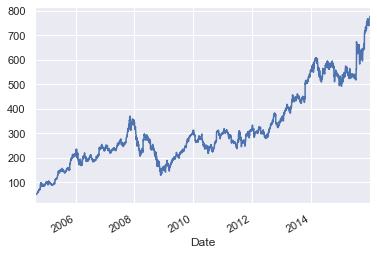

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
goog.plot();

### Передискретизация и изменение периодичности интервалов

При работе с данными временных рядов часто бывает необходимо переразбить их с использованием интервалов другой периодичности. Сделать это можно с помощью метода resample() или гораздо более простого метода asfreq(). Основная разница между ними заключается в том, что resample() выполняет агрегирование данных, а asfreq() — выборку данных.
Рассмотрим, что возвращают эти два метода для данных по ценам закрытия Google при понижающей дискретизации данных. Здесь мы выполняем передискретизацию данных на конец финансового года

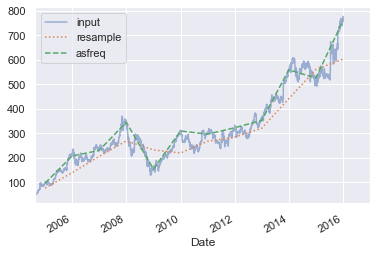

In [97]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

Обратите внимание на различие: в каждой точке resample выдает среднее значение за предыдущий год, а asfreq — значение на конец года.
Вслучае повышающей дискретизации методы resample() и asfreq() в значительной степени идентичны, хотя доступных для использования параметров у resample() гораздо больше. В данном случае оба этих метода по умолчанию оставляют значения интерполированных точек пустыми, то есть заполненными значениями NA. Аналогично обсуждавшейся выше функции pd.fillna() метод asfreq() принимает аргумент method, определяющий, откуда будут браться значения для таких точек. Здесь мы передискретизируем данные по рабочим дням с периодичностью обычного дня, то есть включая выходные дни

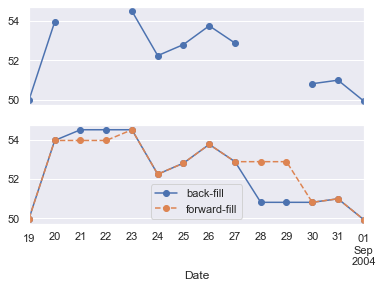

In [101]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

Верхний график представляет поведение по умолчанию: в выходные дни значения равны NA и отсутствуют на графике. Нижний график демонстрирует различия между двумя методиками заполнения пропусков: интерполяцией вперед (forward-fill interpolation) и интерполяцией назад (back-fill interpolation).

### Временные сдвиги

Еще одна распространенная операция с временными рядами — сдвиг данных во времени. В библиотеке Pandas есть два родственных метода для подобных вычислений: shift() и tshift(). Разница между ними заключается в том, что _shift() выполняет сдвиг данных, а tshift() — сдвиг индекса_. В обоих случаях сдвиг задается кратным периоду.

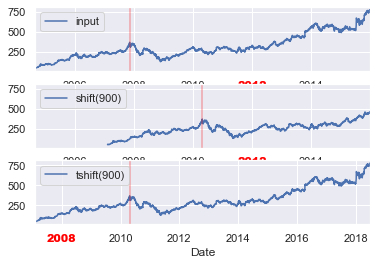

In [108]:
fig, ax = plt.subplots(3, sharey=True)
# задаем периодичность данных
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# Легенды и пояснения
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')
ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')
ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

Видим, что shift(900) сдвигает данные на 900 дней, перемещая часть из них за пределы графика (и оставляя NA-значения с другой стороны), в то время как tshift(900) сдвигает на 900 дней значения индекса.

Такую разновидность сдвигов часто используют для вычисления изменений с течением времени. Например, мы воспользовались сдвинутыми значениями, чтобы вычислить прибыль за год от вложений в акции Google по всему набору данных

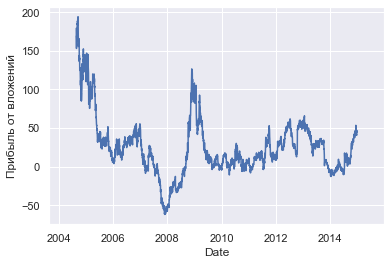

In [110]:
RIO = 100 * (goog.tshift(-365) / goog - 1)
RIO.plot()
plt.ylabel('Прибыль от вложений');

Это помогает увидеть общие тренды акций Google: до сих пор наиболее благоприятным для инвестиций в акции Google был (что неудивительно) момент вскоре после первоначального их размещения на рынке, а также в середине экономической рецессии 2009 года.

### Скользящие окна